# Import

In [260]:
import csv
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nltk import word_tokenize
from tqdm import tqdm
import japanize_matplotlib

## Add configuration file

In [261]:
sys.path.append("/home/jovyan/core/config/")
sys.path.append("/home/jovyan/core/util/")

In [262]:
from ALL import config 
from util import *

## Set condition

In [263]:
tqdm.pandas()
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 50)

In [264]:
data_type = "AgNewsTitle"

# Read data

In [265]:
df = pd.read_csv(f"../../Preprocessing/data/{data_type}/master.csv", index_col=0)

In [266]:
with open(f"../../Preprocessing/data/{data_type}/class.csv", mode="r") as f:
    reader = csv.reader(f)
    class_labels = [label for label in reader]

In [267]:
class_nums = config["data"][data_type]["class_num"]

# Top Text

In [268]:
model_num = 0

In [269]:
pred_df = pd.read_csv(f"../../Clustering/data/{data_type}/LDA/prob/{model_num}.csv", index_col=0)

In [270]:
def getmax_rev(series, topnum=100, getmin=False, getindex=False):
    out = series.nsmallest(topnum) if getmin else series.nlargest(topnum)
    return out.index if getindex else out.set_axis(pd.RangeIndex(1, topnum+1))

In [271]:
classes = ["Business", "Sports", "World", "SciTech"]

In [272]:
df_locs = {}
for class_num in range(class_nums):
    top_index = getmax_rev(pred_df[str(class_num)], topnum=7, getmin=False, getindex=True)

    df_loc = df.loc[top_index, :]
    df_locs[classes[class_num]] = df_loc

In [283]:
title_labels = ["予測：world", "予測：sports",  "予測：business", "予測：sci/tech"]

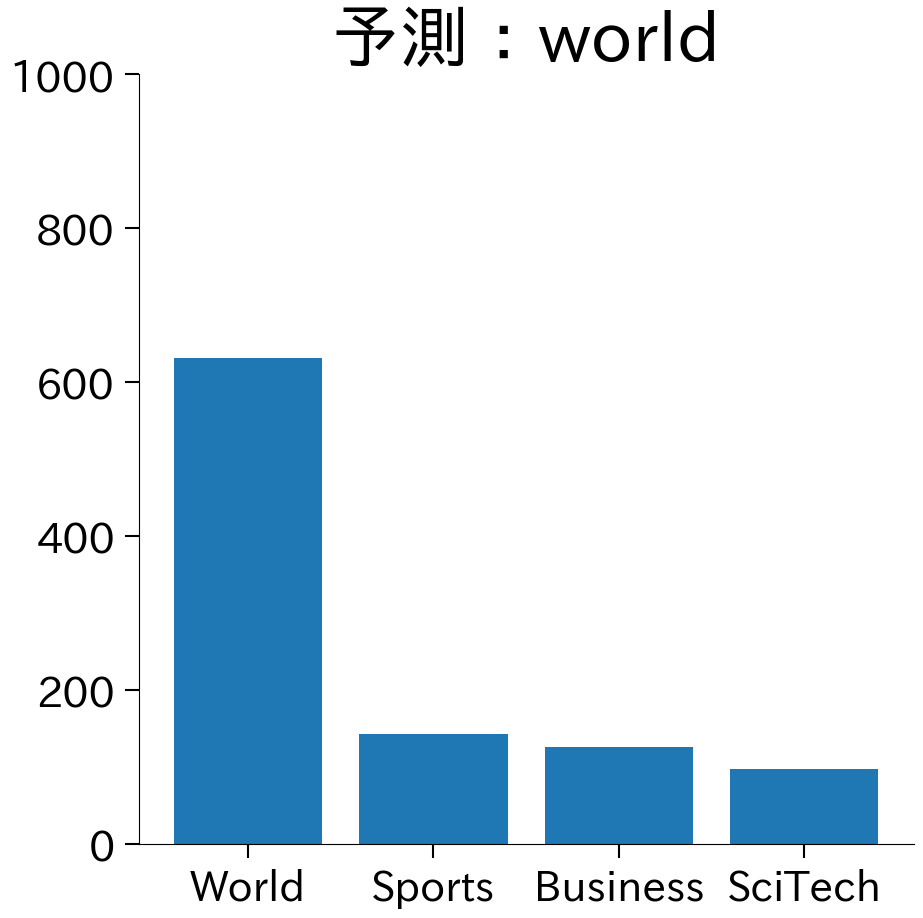

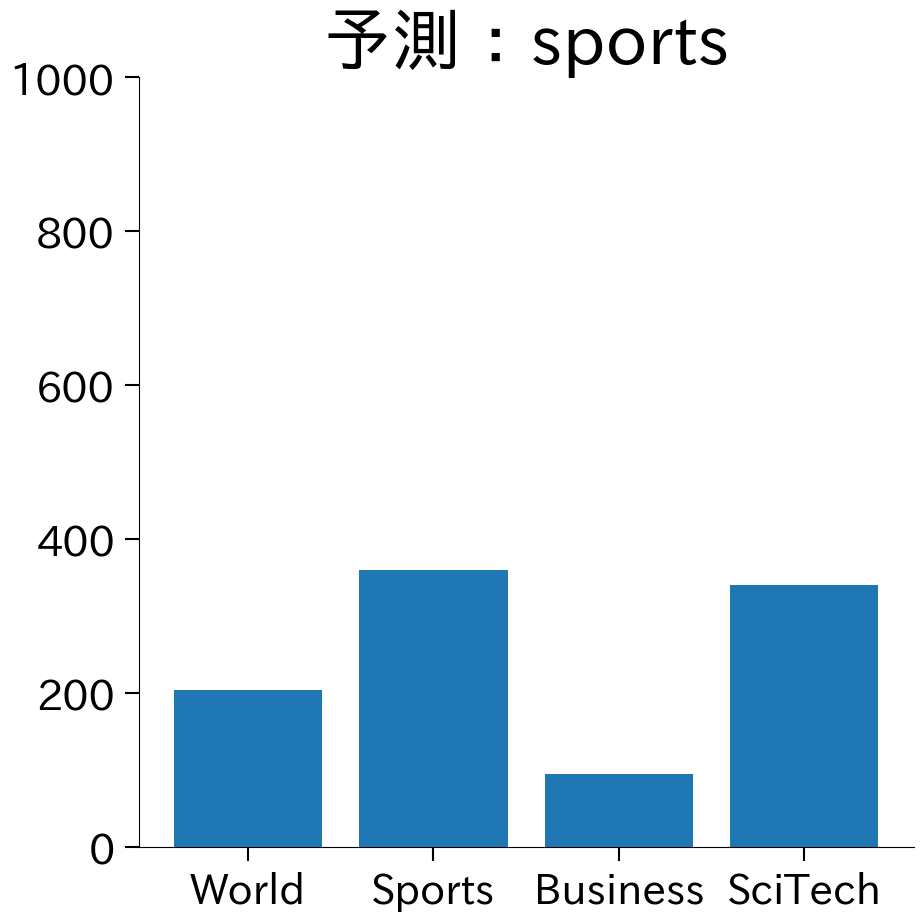

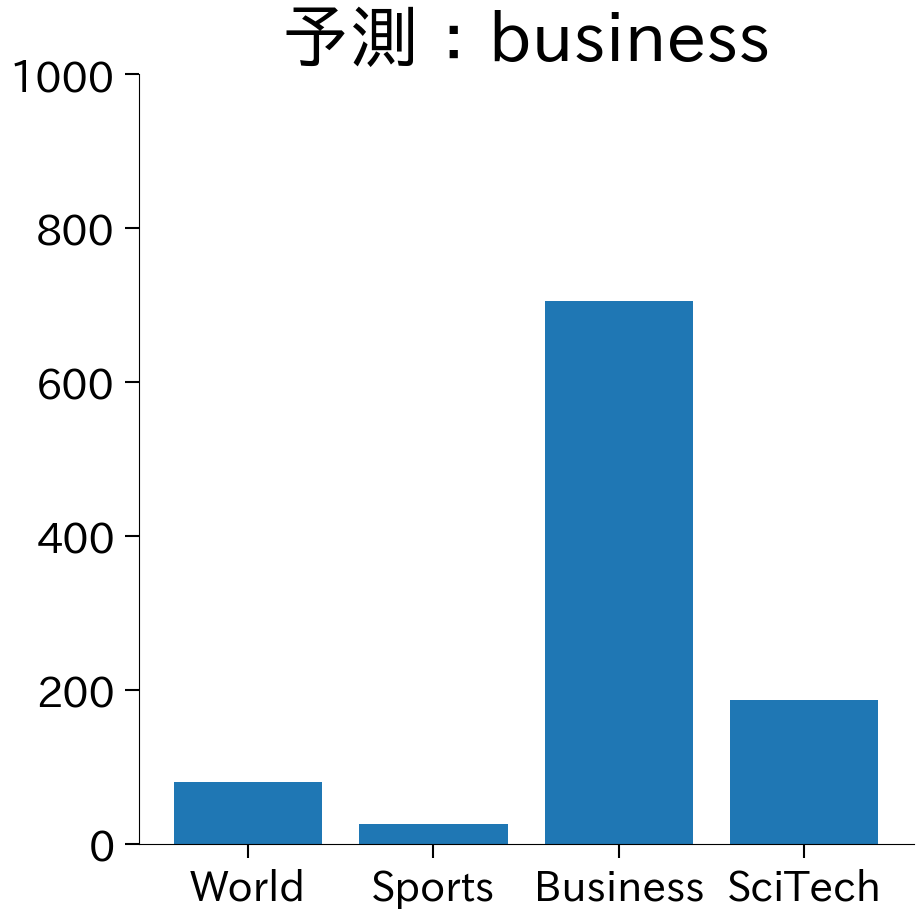

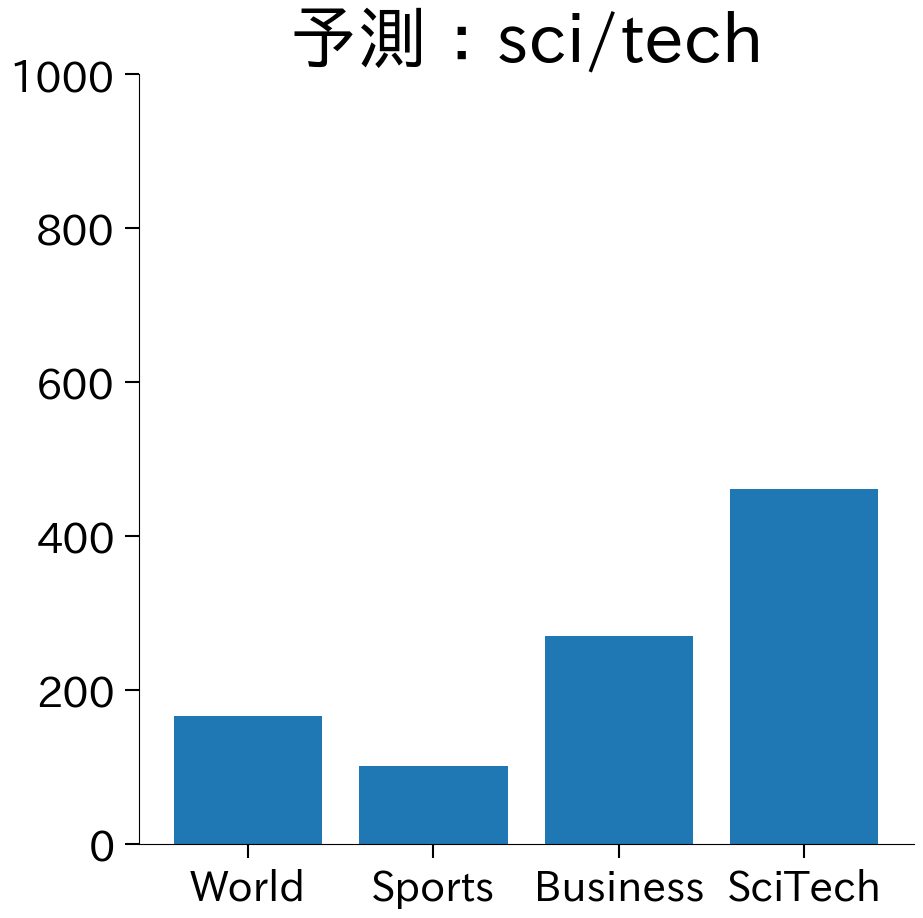

In [287]:
for i, class_num in enumerate([2, 3, 0, 1]):
    fig_path = f"../data/figure/{data_type}/top_texts/top_text_LDA_{data_type}_{title_labels[i].replace('/', '')}.pdf"
    fig = plt.figure(figsize=(10, 10))
#     fig.subplots_adjust(left=0.1, bottom=0.25)

    top_index = getmax_rev(
        pred_df[str(class_num)], topnum=1000, getmin=False, getindex=True
    )
    ax = fig.add_subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(which="both", width=1.5, length=8, size=10, direction="out")
    ax.xaxis.set_tick_params(labelsize=30, pad=7)
    ax.yaxis.set_tick_params(labelsize=30, pad=7)

    ax.set_title(title_labels[i], size=50)

    ax.set_ylim(0, 1000)

    plt.bar(
        *zip(
            *{
                class_label: (df.loc[top_index, "class"] == class_label).sum()
                for class_label in class_labels[0]
            }.items()
        )
    )
    fig.savefig(make_filepath(fig_path))

In [115]:
df_locs["Business"]

,class,text,_text,words,words_nonstop
35153,Business,Coles Myer Full-Year Profit Rises 44 on Sales ...,"Coles Myer Ltd., Australia #39;s biggest retai...",Coles Myer Full-Year Profit Rises 44 on Sales ...,Coles Myer Full-Year Profit Rises 44 Sales Gro...
16047,SciTech,SCO Posts #36;7.4 Million Loss (Ziff Davis),Ziff Davis - Revenue for the quarter of #36;1...,SCO Posts # 36 ; 7.4 Million Loss ( Ziff Davis ),SCO Posts 36 7.4 Million Loss Ziff Davis
1141,World,Flash floods force big rescue operation in tou...,Canadian Press - LONDON (AP) - Heavy rain caus...,Flash floods force big rescue operation in tou...,Flash floods force big rescue operation touris...
10958,World,Liberal MP has no apology for calling U.S. mis...,Canadian Press - OTTAWA (CP) - Prime Minister ...,Liberal MP has no apology for calling U.S. mis...,Liberal MP apology calling U.S. missile defenc...
72769,Business,Dollar Pauses Near Record Low Vs Euro (Reuters),Reuters - The dollar hit an eight-month low\ag...,Dollar Pauses Near Record Low Vs Euro ( Reuters ),Dollar Pauses Near Record Low Vs Euro Reuters
101634,Business,"Dollar Struggles, Hits Record Low Vs Euro (Reu...",Reuters - The dollar struggled to keep above a...,"Dollar Struggles , Hits Record Low Vs Euro ( R...",Dollar Struggles Hits Record Low Vs Euro Reuters
421,SciTech,Search Engine Marketing Mistakes Retailers Nee...,Search Engine Marketing Mistakes Retailers Nee...,Search Engine Marketing Mistakes Retailers Nee...,Search Engine Marketing Mistakes Retailers Nee...


In [116]:
df_locs["SciTech"]

,class,text,_text,words,words_nonstop
118392,SciTech,"Illinois Governor Wants To Keep #39;GTA, #39;...",That iconic black-and-white parental advisory ...,"Illinois Governor Wants To Keep # 39 ; GTA , #...",Illinois Governor Wants Keep 39 GTA 39 39 Halo...
9442,World,Experts Say Nepal Rebels #39; Plan Resembles P...,Nepal #39;s communist insurgency has been flex...,Experts Say Nepal Rebels # 39 ; Plan Resembles...,Experts Say Nepal Rebels 39 Plan Resembles Per...
32894,Business,"China Power Sets IPO Price Range, May Raise \$...","China Power International Development Ltd., a ...","China Power Sets IPO Price Range , May Raise \...",China Power Sets IPO Price Range May Raise 330...
36622,Sports,NL Wrap: Rallying Reds Make Braves Wait for Ea...,Reuters - Javier Valentin smacked a three-run\...,NL Wrap : Rallying Reds Make Braves Wait for E...,NL Wrap Rallying Reds Make Braves Wait East Ti...
37255,World,"North Korean Missile Test Isn #39;t Imminent, ...",North Korea isn #39;t on the verge of test-fir...,North Korean Missile Test Isn # 39 ; t Imminen...,North Korean Missile Test 39 Imminent 39 Japan...
36556,Sports,NL Wrap: Rallying Reds Make Braves Wait for Ea...,Javier Valentin smacked a three-run homer in a...,NL Wrap : Rallying Reds Make Braves Wait for E...,NL Wrap Rallying Reds Make Braves Wait East Title
1876,Business,Air Canada Creditors Clear Carrier #39;s Bankr...,Aug. 17 (Bloomberg) -- Air Canada creditors in...,Air Canada Creditors Clear Carrier # 39 ; s Ba...,Air Canada Creditors Clear Carrier 39 Bankrupt...


In [117]:
df_locs["World"]

,class,text,_text,words,words_nonstop
17792,World,Syria under Security Council Scrutiny ... A Gi...,Syria has turned herself into cannon fodder in...,Syria under Security Council Scrutiny ... A Gi...,Syria Security Council Scrutiny Gift Syria lt ...
23141,World,Laden aide says US forces driven into trenches...,"Osama bin Laden #39;s aide, Ayman al-Zawahri, ...",Laden aide says US forces driven into trenches...,Laden aide says US forces driven trenches Afgh...
2837,Sports,US ; Japanese-born teen youngest US chess cham...,"US News, NEW YORK - A teenager from New York s...",US ; Japanese-born teen youngest US chess cham...,US Japanese-born teen youngest US chess champ ...
59841,World,"Insecurity across Darfur, Sudan threatens aid ...",13 October 2004 - The United Nations food reli...,"Insecurity across Darfur , Sudan threatens aid...",Insecurity across Darfur Sudan threatens aid d...
189,SciTech,&lt;em&gt;El Reg&lt;/em&gt; pledges to name BS...,&lt;strong&gt;Competition&lt;/strong&gt; Get t...,& lt ; em & gt ; El Reg & lt ; /em & gt ; pled...,lt em gt El Reg lt /em gt pledges name BSA ant...
25816,Sports,"(Sports Network) - Very quietly, the Philadelp...",are ahead of Larry Bowa #39;s team in the chas...,"( Sports Network ) - Very quietly , the Philad...",Sports Network quietly Philadelphia Phillies l...
118573,World,"Iran, Syria and the Iraqi quagmire: rein in ma...","On Wednesday, Iraqi interim Defense Minister H...","Iran , Syria and the Iraqi quagmire : rein in ...",Iran Syria Iraqi quagmire rein manipulation lt...


In [118]:
df_locs["Sports"]

,class,text,_text,words,words_nonstop
844,Business,Hungarian central bank cuts key interest rate ...,AFP - The Hungarian central bank cut its bench...,Hungarian central bank cuts key interest rate ...,Hungarian central bank cuts key interest rate ...
98820,Business,Hungarian central bank cuts key interest rate ...,AFP - Hungary's central bank again lowered its...,Hungarian central bank cuts key interest rate ...,Hungarian central bank cuts key interest rate ...
12908,Sports,Paradorn edges out Johansson to reach the last...,Defending champion Paradorn Srichaphan overpow...,Paradorn edges out Johansson to reach the last...,Paradorn edges Johansson reach last four Long ...
10198,World,Indian state govt under cloud as deadly riots ...,AFP - Police and officials in Gujarat are slow...,Indian state govt under cloud as deadly riots ...,Indian state govt cloud deadly riots probed AFP
53598,Sports,Denmark soccer strike ends but parties refuse ...,Denmark #39;s first ever soccer strike was cal...,Denmark soccer strike ends but parties refuse ...,Denmark soccer strike ends parties refuse disc...
8779,SciTech,"Microsoft Singapore releases Windows XP SP 2, ...",The free service pack is a major overhaul aime...,"Microsoft Singapore releases Windows XP SP 2 ,...",Microsoft Singapore releases Windows XP SP fre...
1715,SciTech,Analysts fear longer than expected G5 delays (...,MacCentral - Analysts from Prudential Equity G...,Analysts fear longer than expected G5 delays (...,Analysts fear longer expected G5 delays MacCen...


In [119]:
top_texts = pd.DataFrame([df_locs[_class].loc[:, "text"].to_numpy() for _class in classes]).T

In [120]:
top_text_chart = top_texts

In [121]:
top_text_chart.index = top_text_chart.index + 1

In [122]:
# 0   ビジネス
# 1   科学・技術
# 2   世界
# 3   スポーツ

In [123]:
# 世界，科学/技術，スポーツ，ビジネス

In [124]:
top_text_chart = top_text_chart.reindex(columns = [2, 1, 3, 0])

In [125]:
print(
    top_text_chart.style.format("\\textit{{{}}}", precision=3, escape="latex").to_latex(
        column_format="p{1cm}p{3.5cm}p{3.5cm}p{3.5cm}p{3.5cm}",
        position="ht",
        position_float="centering",
        hrules=True,
        caption="LDAで高い確信度(確率)で分類された文書(AgTitle)",
        label="table:sentence_list_lda",
        multicol_align="r",
    )
)

\begin{table}[ht]
\centering
\caption{LDAで高い確信度(確率)で分類された文書(AgTitle)}
\label{table:sentence_list_lda}
\begin{tabular}{p{1cm}p{3.5cm}p{3.5cm}p{3.5cm}p{3.5cm}}
\toprule
 & 2 & 1 & 3 & 0 \\
\midrule
1 & \textit{Syria under Security Council Scrutiny ... A Gift from Syria to \&lt;b\&gt;...\&lt;/b\&gt;} & \textit{Hungarian central bank cuts key interest rate by half percentage point (AFP)} & \textit{Illinois Governor Wants To Keep  \#39;GTA, \#39;  \#39;Halo 2 \#39; Out Of Kids \#39; Hands} & \textit{Coles Myer Full-Year Profit Rises 44 on Sales Growth (Update1)} \\
2 & \textit{Laden aide says US forces driven into trenches in Afghanistan \&lt;b\&gt;...\&lt;/b\&gt;} & \textit{Hungarian central bank cuts key interest rate by half a point (AFP)} & \textit{Experts Say Nepal Rebels \#39; Plan Resembles Peru \#39;s Shining Path} & \textit{SCO Posts  \#36;7.4 Million Loss (Ziff Davis)} \\
3 & \textit{US ; Japanese-born teen youngest US chess champ since Bobby \&lt;b\&gt;...\&lt;/b\&gt;} & \textit{

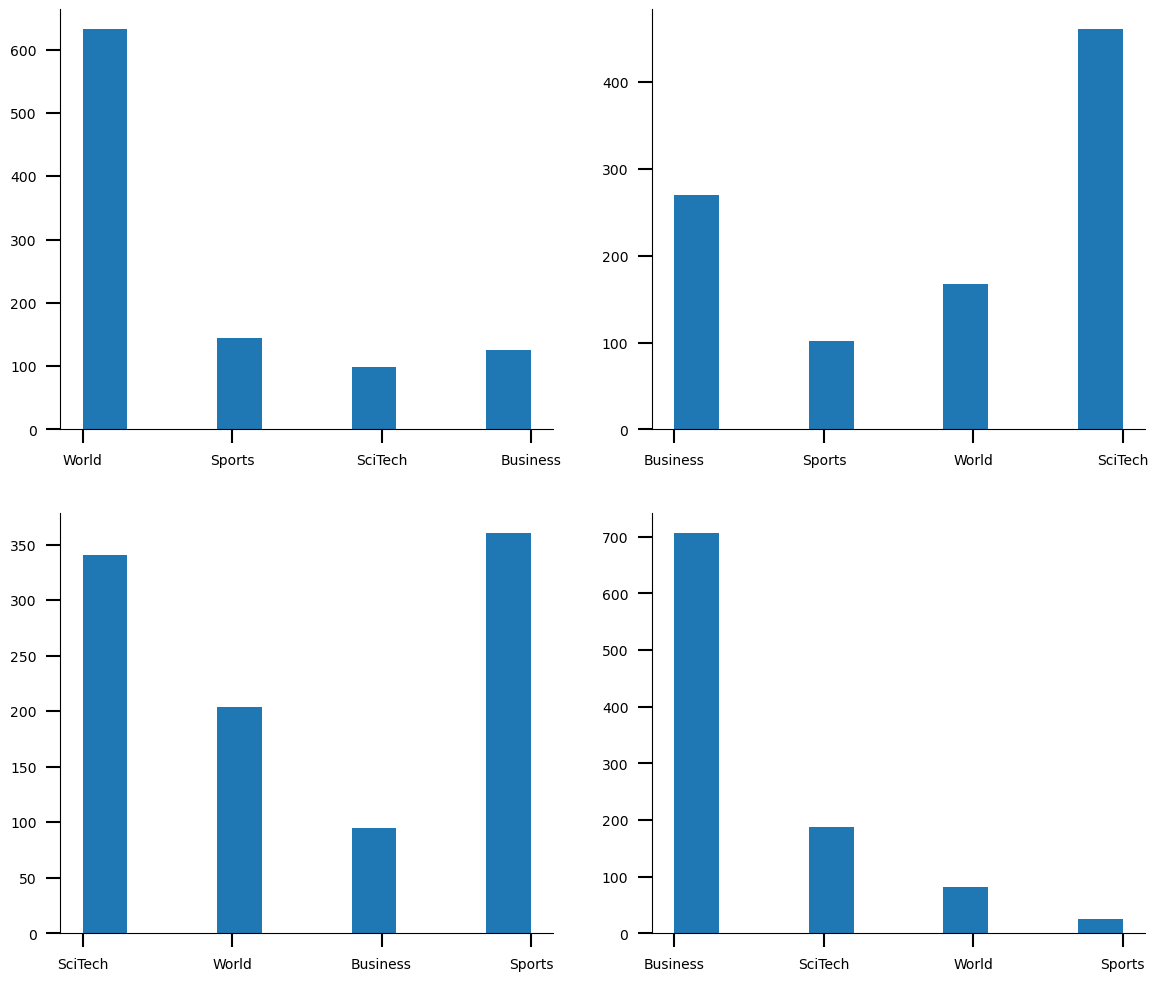

In [138]:
fig_path = f"../data/figure/{data_type}/top_text_LDA_{data_type}.pdf"
fig = plt.figure(figsize=(14, 12))

for i, class_num in enumerate([2, 1, 3, 0]):
    top_index = getmax_rev(pred_df[str(class_num)], topnum=1000, getmin=False, getindex=True)
    ax = fig.add_subplot(2, 2, i + 1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(which="both", width=1.5, length=8, size=10, direction="out")
    ax.xaxis.set_tick_params(labelsize=10, pad=7)
    ax.yaxis.set_tick_params(labelsize=10, pad=7)

    plt.hist(df.loc[top_index, "class"], align="mid")
    fig.savefig(make_filepath(fig_path))

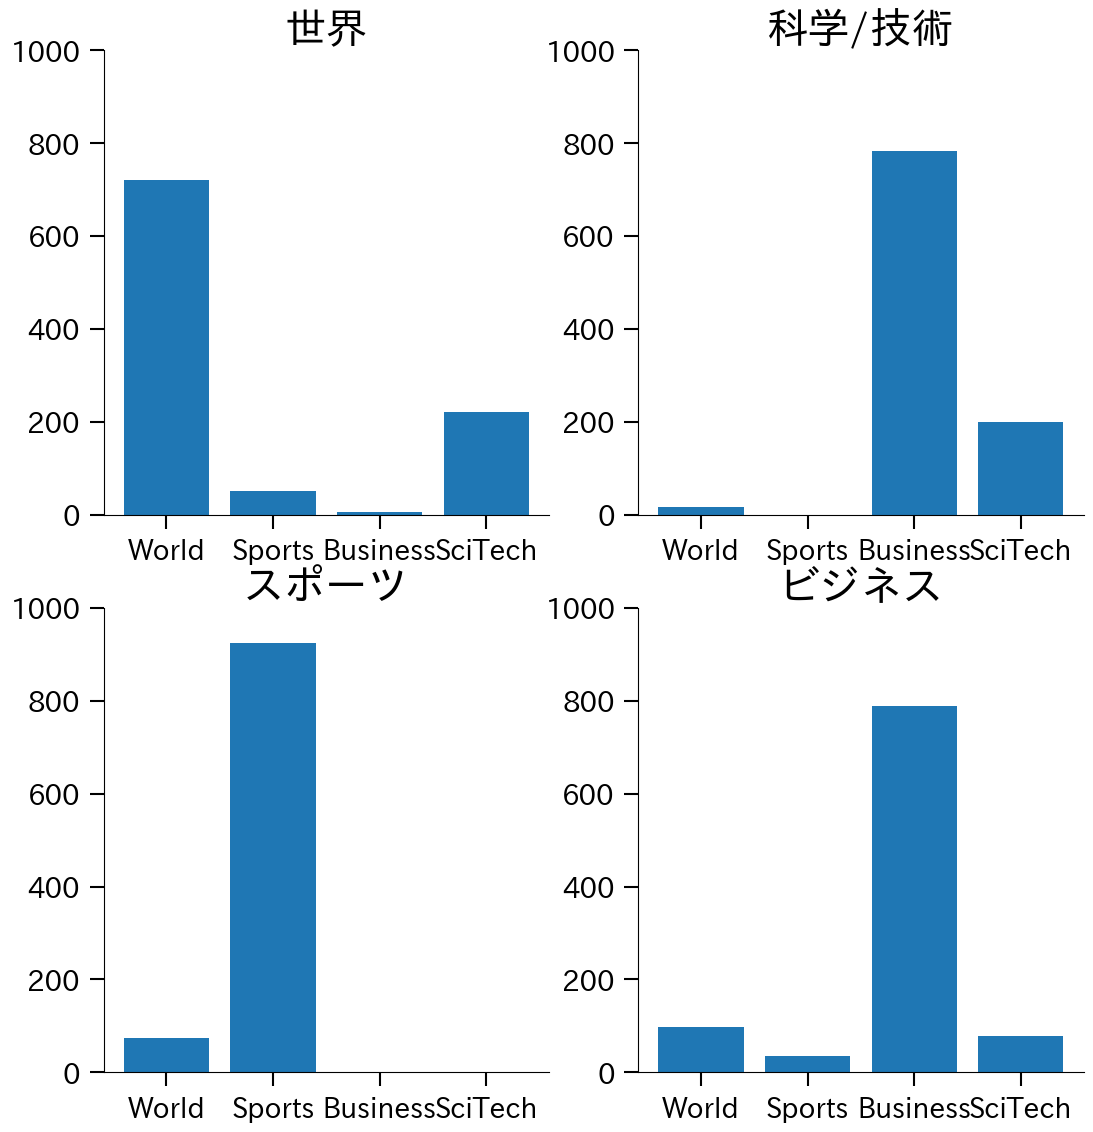

In [240]:
fig_path = f"../data/figure/{data_type}/top_text_LDA_{data_type}.pdf"
fig = plt.figure(figsize=(14, 14))
fig.subplots_adjust(left=0.2, bottom=0.15)

for i, class_num in enumerate([1, 0, 2, 3]):
    top_index = getmax_rev(pred_df[str(class_num)], topnum=1000, getmin=False, getindex=True)
    ax = fig.add_subplot(2, 2, i + 1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(which="both", width=1.5, length=8, size=10, direction="out")
    ax.xaxis.set_tick_params(labelsize=20, pad=7)
    ax.yaxis.set_tick_params(labelsize=20, pad=7)
    
    ax.set_title(["世界", "科学/技術", "スポーツ", "ビジネス"][i], size=30)
    
    ax.set_ylim(0, 1000)

    plt.bar(*zip(*{class_label :(df.loc[top_index, "class"]==class_label).sum() for class_label in class_labels[0]}.items()))
    fig.savefig(make_filepath(fig_path))